## Imports 

In [1]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from IPython.display import Image
import datetime

### Loading data

In [2]:
df_sales_raw= pd.read_csv('train.csv',low_memory= False)
df_store_raw= pd.read_csv('store.csv',low_memory= False)
# Fazendo o merge dos dados para transformar os dois datasets em apenas 1 
df_raw=pd.merge(df_sales_raw,df_store_raw,how='left', on='Store')


In [3]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
16065,456,5,2015-07-17,5156,754,1,1,0,1,a,c,140.0,NaN,NaN,0,NaN,NaN,NaN


## 1. Descrição dos dados


### 1.1. Renomeando as colunas 

In [4]:
df1=df_raw.copy()  #criando uma copia do data para seguranca dos dados originais


In [5]:
df1.columns      #olhando os nomes das colunas

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [6]:
cols_old=['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']
snakecase=lambda x:inflection.underscore(x) 
cols_new=list(map(snakecase,cols_old))  #lambda: e a declaracao de uma funcao 
#snakecase: reencreve em minusculo e com _ como separador
#funcao map: faz o mapeamento da funcao snakecase em todas as palavras da lista cols_old

#Rename
df1.columns=cols_new


### 1.2 Dimensao dos dados

In [7]:
print('Numbers of Rows:{}'.format(df1.shape[0])) 
print('Numbers of Columns:{}'.format(df1.shape[1]))

Numbers of Rows:1017209
Numbers of Columns:18


### 1.3. Tipo de dados 

In [8]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [9]:
df1['date']=pd.to_datetime(df1['date'])  # ajustando a variavel de data 



### 1.4 Checando os NAs

In [10]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### 1.5 Preenchendo os NAs

In [11]:
# opcao 1. excluir os NAs /// opcao 2. preencher com a media /// opcao 3. pensar como quem entende do negocio 

#competition_distance (Na's faltantes:  2642 )

df1['competition_distance']=df1['competition_distance'].apply(lambda x:2000000.0 if math.isnan(x) else x)
# distancia em metros do competidor mais proximo . 
# math.isnam : encontra na coluna os valores sem dados 



In [12]:
df1['competition_distance'].max()

2000000.0

In [13]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance                 0
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [14]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
593618,109,3,2014-01-15,5541,652,1,0,0,0,a,c,3300.0,11.0,2010.0,0,NaN,NaN,NaN


In [15]:

#nao possui competidor proximo ou nao tem o dado
#No entendimento assumo que : se tiver dados vazios(isnan.math) na coluna 'competition since mounth/year/week', eu vou pegar a coluna 'date' extrair o mes e substituindo o NA, aplicando(apply)em todas as colunas (axis 1)
    
#competition_open_since_month (Na's faltantes: 323348)
#mes e ano que o competidor abriu 
df1['competition_open_since_month']=df1.apply(lambda x:x ['date'].month if math.isnan (x['competition_open_since_month'])else x ['competition_open_since_month'],axis=1)

#competition_open_since_year   ( Na's faltantes:  323348)
df1['competition_open_since_year']=df1.apply(lambda x:x ['date'].year if math.isnan (x['competition_open_since_year'])else x ['competition_open_since_year'],axis=1)

#promo2_since_week             ( Na's faltantes:  508031)
df1['promo2_since_week']=df1.apply(lambda x:x ['date'].week if math.isnan (x['promo2_since_week'])else x ['promo2_since_week'],axis=1)

#promo2_since_year             ( Na's faltantes:  508031)
df1['promo2_since_year']=df1.apply(lambda x:x ['date'].year if math.isnan (x['promo2_since_year'])else x ['promo2_since_year'],axis=1)

#promo_interval                  508031
#crio uma lista de meses, se a data estiver dentro da lista a promo2 foi ativa.

month_map={1:'Jan',2:'Fev',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df1['promo_interval'].fillna(0,inplace=True) #fillna na coluna promo_interval com valor 0, #inplace=true para nao retornar nada, com modificacao direto na coluna 

df1['month_map']=df1['date'].dt.month.map(month_map) # substituindo os dados da coluna date para os meses da lista month map
df1['is_promo']=df1[['promo_interval','month_map']].apply(lambda x:0 if x['promo_interval']==0 else 1if x['month_map']in x['promo_interval'].split(',')else 0, axis=1)                                      



In [18]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

In [17]:
df1.sample(5).T

,997924,790032,732731,498454,151921
store,785,283,962,835,282
day_of_week,5,2,5,5,2
date,2013-01-18 00:00:00,2013-07-23 00:00:00,2013-09-13 00:00:00,2014-04-11 00:00:00,2015-03-17 00:00:00
sales,3951,6057,7408,4777,5615
customers,416,674,1088,661,701
open,1,1,1,1,1
promo,0,0,1,0,1
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,0
store_type,d,a,c,a,a


### 1.6 Change types


In [19]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [20]:
df1['competition_open_since_year']=df1['competition_open_since_year'].astype(int)
df1['competition_open_since_month']=df1['competition_open_since_month'].astype(int)
df1['promo2_since_week']=df1['promo2_since_week'].astype(int)
df1['promo2_since_year']=df1['promo2_since_year'].astype(int)

### 1.7 Descrição estatística 

In [23]:
# separando as variaveis numericas e as categoricas 
num_attributes= df1.select_dtypes(include=['int64','float64'])
cat_attributes= df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

In [25]:
num_attributes.sample(2)


,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
17728,1004,4,5653,465,1,1,0,970.0,7,2015,1,9,2011,0
942627,123,5,8318,989,1,1,0,16760.0,9,2011,0,10,2013,0


In [26]:
cat_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval,month_map
780382,0,c,a,0,Aug
39024,0,d,c,"Mar,Jun,Sept,Dec",Jun


### 1.7.1 Numéricos

In [28]:
# central tendency- mean, median
ct1=pd.DataFrame(num_attributes.apply(np.mean)).T
ct2=pd.DataFrame(num_attributes.apply(np.median)).T
#Dispersion- std,min,max,range,skew,kurtosis
d1=pd.DataFrame(num_attributes.apply(np.std)).T
d2=pd.DataFrame(num_attributes.apply(min)).T
d3=pd.DataFrame(num_attributes.apply(max)).T
d4=pd.DataFrame(num_attributes.apply(lambda x:x.max()-x.min())).T
d5=pd.DataFrame(num_attributes.apply(lambda x:x.skew())).T
d6=pd.DataFrame(num_attributes.apply(lambda x:x.kurtosis())).T
#concatenate
m=pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns=(['attributes','min','max','range','mean','median','std','skew','kurtosis'])


In [29]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,2000000.0,1999980.0,10610.588099,2330.0,101810.649100,19.378002,375.644405
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


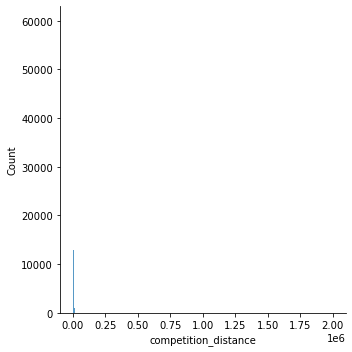

In [38]:
sns.displot(df1['competition_distance'])

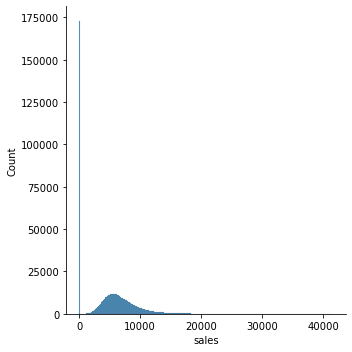

In [39]:
sns.displot(df1['sales'])

### 1.7.2 Categóricos

In [40]:
cat_attributes.apply(lambda x:x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='state_holiday', ylabel='sales'>

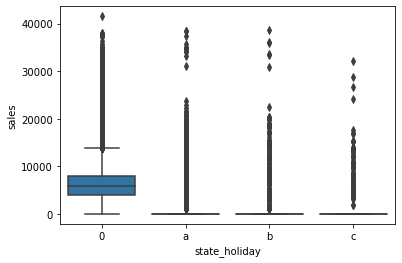

In [42]:
# box plot : formula: sns.boxplot( x= 'nome da categoria', y= 'objeto a ser medido', data= 'dados do data frame ou lista')
sns.boxplot(x='state_holiday',y='sales', data= df1)


<AxesSubplot:xlabel='state_holiday', ylabel='sales'>

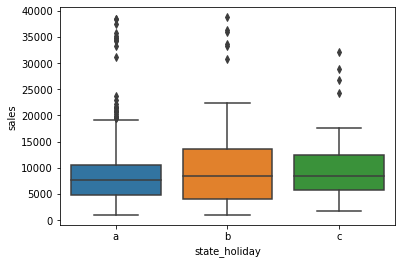

In [46]:

aux1=df1[(df1['state_holiday']!='0')& (df1['sales']>0)]
sns.boxplot(x='state_holiday',y='sales', data= aux1)


<AxesSubplot:xlabel='assortment', ylabel='sales'>

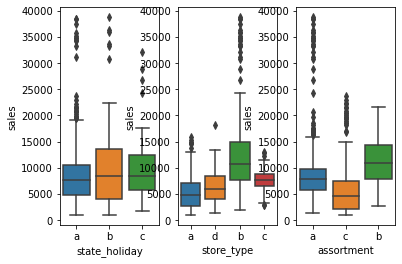

In [58]:
aux1=df1[(df1['state_holiday']!='0')& (df1['sales']>0)]

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday',y='sales', data= aux1)

plt.subplot(1,3,2)
sns.boxplot(x='store_type',y='sales',data=aux1)

plt.subplot(1,3,3)
sns.boxplot(x='assortment',y='sales',data=aux1)


## 2.0 Feature engineering